# Analyse statistique et manipulation de données


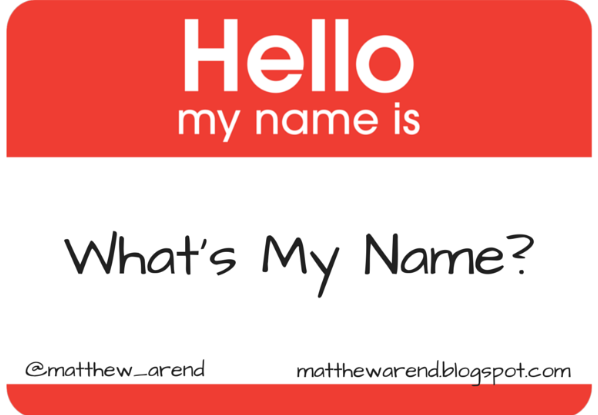

Plan:

1. Chargement des données
2. Statistique descriptive
3. Manipulation des données avec dplyr


#### Dplyr tutoriel:

* https://suzan.rbind.io/2018/02/dplyr-tutorial-3/#filtering-rows-based-on-a-numeric-variable
* https://rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf
* https://cran.r-project.org/web/packages/dplyr/index.html

# 1/ Chargement des donnnées

#### Définition du nom d fichier

In [23]:
# Définition du nom d fichier
filename <- "data_prenom_US.csv" 
# Chargement du fichier
dataset <- read.csv(filename, header=TRUE, encoding = "UTF-8") 
#### Chanement du nom des colonnes
#names(dataset) <- c("X", "année", "prénom", "genre", "naissance")
# Affichage des 5 premières lignes
head(dataset)

X,année,prénom,genre,naissances
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578


In [21]:
library("dplyr")
dataset %>% filter(prénom == "Kim") %>% head(5)

X,année,prénom,genre,naissances
104617,1912,Kim,M,5
110878,1913,Kim,M,7
115668,1914,Kim,F,5
128807,1915,Kim,M,5
143724,1917,Kim,F,5


In [6]:
### Dimension des données

dim(dataset)

[1] 1891894       5

In [8]:
#### Type de données pour chaque variable

sapply(dataset, class)


X     année    prénom     genre naissance 
"integer" "integer"  "factor"  "factor" "integer"

# 2/ Analyse statistique

In [9]:
#### Summury des données

summary(dataset)

       X               année          prénom        genre      
 Min.   :      0   Min.   :1880   Francis:    274   F:1119824  
 1st Qu.: 472973   1st Qu.:1951   James  :    274   M: 772070  
 Median : 945947   Median :1984   Jean   :    274              
 Mean   : 945947   Mean   :1974   Jesse  :    274              
 3rd Qu.:1418920   3rd Qu.:2002   Jessie :    274              
 Max.   :1891893   Max.   :2016   John   :    274              
                                  (Other):1890250              
   naissance      
 Min.   :    5.0  
 1st Qu.:    7.0  
 Median :   12.0  
 Mean   :  182.1  
 3rd Qu.:   32.0  
 Max.   :99685.0  
                  

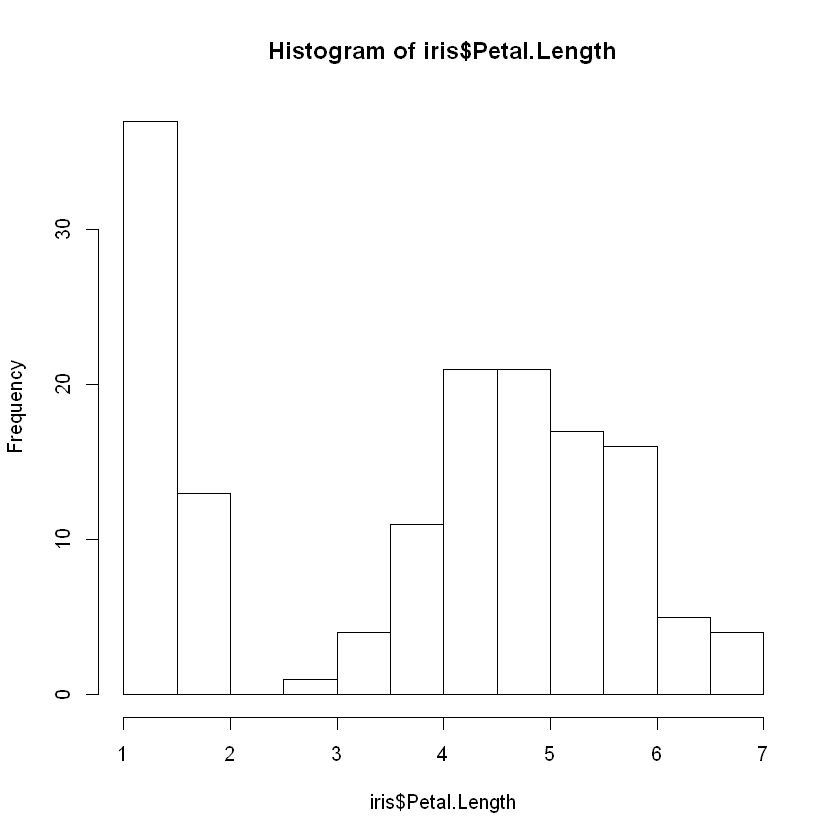

In [67]:
#### Visualisation des données

data(iris)
hist(iris$Petal.Length)

# 3/  Manipulation de données avec dplyr

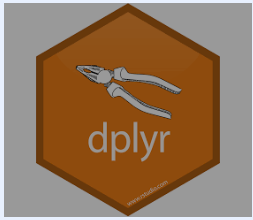

Il ya 5 fonctions à connaitre dans le package dplyr.
* **select** : Selection de colonnes
* **filter** : Filtre sur les données
* **mutate** : Création d'une nouvel colonne
* **arrange** : Trie des données
* **summarise** : Aggrege les données en un résumé

In [4]:
#### Chargement dplyr

library("dplyr")

Warning message:
"package 'dplyr' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [22]:
#### Sélection des colonnes année et naissance
head(select(dataset, année, naissance ),5)

ERROR: Error in .f(.x[[i]], ...): objet 'naissance' introuvable


In [6]:
#### Autrement, on peut écrire cette fonction avec le pipe
#### Equivalent du point en python
select(dataset, année, naissance ) %>% head()

ERROR: Error in .f(.x[[i]], ...): objet 'naissance' introuvable


In [7]:
#### Ou encore(méthode que je recommande)

dataset %>% select(année, naissances) %>% head()

année,naissances
1880,7065
1880,2604
1880,2003
1880,1939
1880,1746
1880,1578


#### Filter

In [8]:
#### Filtre sur l'année 2015

head(filter(dataset, année == "2015"),5)

X,année,prénom,genre,naissances
1825963,2015,Emma,F,20415
1825964,2015,Olivia,F,19638
1825965,2015,Sophia,F,17381
1825966,2015,Ava,F,16340
1825967,2015,Isabella,F,15574


Attention à bien mettre le == au lieu dusigne =

In [9]:
#### Autrement

dataset %>% filter(année== "2015") %>% head()

X,année,prénom,genre,naissances
1825963,2015,Emma,F,20415
1825964,2015,Olivia,F,19638
1825965,2015,Sophia,F,17381
1825966,2015,Ava,F,16340
1825967,2015,Isabella,F,15574
1825968,2015,Mia,F,14871


#### Arrange

In [12]:
#### Trie des données par naissance et année par ordre croissant

head(arrange(dataset, naissances,année), 10)

X,année,prénom,genre,naissances
835,1880,Adelle,F,5
836,1880,Adina,F,5
837,1880,Adrienne,F,5
838,1880,Albertine,F,5
839,1880,Alys,F,5
840,1880,Ana,F,5
841,1880,Araminta,F,5
842,1880,Arthur,F,5
843,1880,Birtha,F,5
844,1880,Bulah,F,5


In [13]:
#### Trie des données par ordre décroissant

head(arrange(dataset, desc(naissances), desc(année)), 20)


X,année,prénom,genre,naissances
431059,1947,Linda,F,99685
441430,1948,Linda,F,96210
437162,1947,James,M,94762
544612,1957,Michael,M,92716
437163,1947,Robert,M,91641
451669,1949,Linda,F,91013
533150,1956,Michael,M,90620
556187,1958,Michael,M,90512
447469,1948,James,M,88584
510799,1954,Michael,M,88525


#### Mutate

In [14]:
#### Ajout d'une nouvelle variable year_start qui définie l'année 1880 comme l'année 0

mutate(dataset, year_start = année - 1880) %>% head()

X,année,prénom,genre,naissances,year_start
0,1880,Mary,F,7065,0
1,1880,Anna,F,2604,0
2,1880,Emma,F,2003,0
3,1880,Elizabeth,F,1939,0
4,1880,Minnie,F,1746,0
5,1880,Margaret,F,1578,0


#### Summarise

In [17]:
#### Résumé des données à l'aide de summaryse
#### Somme totale des prénoms

summarise(dataset, somme = sum(naissances))

somme
344533897


In [18]:
#### Grouper par annéee le nombre de prénom

by_annee <- group_by(dataset, année)
summarise(by_annee, somme = sum(naissances), na.rm = TRUE) %>% head()

année,somme,na.rm
1880,201483,TRUE
1881,192696,TRUE
1882,221533,TRUE
1883,216945,TRUE
1884,243463,TRUE
1885,240854,TRUE


In [24]:
dataset %>% filter(prénom == "Yacine" | prénom == "Yacine") %>% arrange(année)

X,année,prénom,genre,naissances
1259057,1997,Yacine,F,9
1332640,1999,Yacine,M,5
1347652,2000,Yacine,F,6
1374457,2001,Yacine,F,8
1410710,2002,Yacine,F,5
1486429,2004,Yacine,M,5
1502867,2005,Yacine,F,6
1514751,2005,Yacine,M,8
1553034,2006,Yacine,M,5
1573545,2007,Yacine,F,5


In [28]:
#### Apprenant

dataset %>% filter(prénom == "Brandon" & genre =="F") %>% arrange(année)

X,année,prénom,genre,naissances
508883,1954,Brandon,F,7
519558,1955,Brandon,F,8
532296,1956,Brandon,F,5
554631,1958,Brandon,F,6
566309,1959,Brandon,F,6
590282,1961,Brandon,F,6
602474,1962,Brandon,F,6
614110,1963,Brandon,F,7
626569,1964,Brandon,F,7
638765,1965,Brandon,F,7


In [ ]:
filter(dataset,prénom =="yac")
l

In [3]:
library("dplyr")

Warning message:
"package 'dplyr' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [20]:
#### POur l'année 2015

data <- dataset %>% filter(année == "2015")
%>% group_by(prénom, genre)  %>% arrange(prénom, genre) %>% distinct(prénom, genre, .keep_all = TRUE)  

In [31]:
data_m <- data %>% filter(genre =="M")

data_f <- data %>% filter(genre == "F")

In [40]:
#### Liste des prénoms à la fois masculin et féminin

#### COndition sur existance du prénom dans la deuxime colonne


data_final <- data_m %>% inner_join(data_f, by = "prénom") %>% arrange(prénom)
head(data_final,50)

X.x,année.x,prénom,genre.x,naissances.x,X.y,année.y,genre.y,naissances.y
1850294,2015,Aalijah,M,17,1834857,2015,F,12
1857066,2015,Aaliyah,M,5,1826010,2015,F,4850
1854562,2015,Aamari,M,7,1836801,2015,F,9
1851323,2015,Aarian,M,13,1837758,2015,F,8
1850740,2015,Aarion,M,15,1838934,2015,F,7
1845068,2015,Aaron,M,7144,1832384,2015,F,19
1849708,2015,Aarya,M,20,1827275,2015,F,180
1848689,2015,Aaryn,M,29,1829383,2015,F,46
1847691,2015,Abbott,M,45,1840404,2015,F,6
1853033,2015,Abeer,M,9,1836070,2015,F,10


In [39]:
data_final %>% filter(genre.x == "M" & genre.y =="F")

X.x,année.x,prénom,genre.x,naissances.x,X.y,année.y,genre.y,naissances.y
1850294,2015,Aalijah,M,17,1834857,2015,F,12
1857066,2015,Aaliyah,M,5,1826010,2015,F,4850
1854562,2015,Aamari,M,7,1836801,2015,F,9
1851323,2015,Aarian,M,13,1837758,2015,F,8
1850740,2015,Aarion,M,15,1838934,2015,F,7
1845068,2015,Aaron,M,7144,1832384,2015,F,19
1849708,2015,Aarya,M,20,1827275,2015,F,180
1848689,2015,Aaryn,M,29,1829383,2015,F,46
1847691,2015,Abbott,M,45,1840404,2015,F,6
1853033,2015,Abeer,M,9,1836070,2015,F,10


In [14]:
dataset %>% filter(année == "2015") %>% group_by(prénom)  %>% arrange(prénom, genre) %>% filter(p )

X,année,prénom,genre,naissances
1850738,2015,Aaban,M,15
1838927,2015,Aabha,F,7
1842330,2015,Aabriella,F,5
1842331,2015,Aada,F,5
1849408,2015,Aadam,M,22
1852489,2015,Aadan,M,10
1850739,2015,Aadarsh,M,15
1845800,2015,Aaden,M,297
1848518,2015,Aadhav,M,31
1857063,2015,Aadhavan,M,5


# Evolution des prénom dans le temps

In [2]:
library("dplyr")

Warning message:
"package 'dplyr' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [8]:
#### Evolution des Paul dans le temps

dataset %>% filter(prénom == "Paul") %>% head(5)

X,année,prénom,genre,naissances
1001,1880,Paul,M,301
2992,1881,Paul,M,291
5006,1882,Paul,M,397
7163,1883,Paul,M,358
9280,1884,Paul,F,5


#### Paul: prénom masculin

In [10]:
paul_M <- dataset %>% filter(prénom =="Paul") %>% filter(genre == "M") %>% select(année, naissances)
head(paul_M, 3)

année,naissances
1880,301
1881,291
1882,397


In [11]:
dim(paul_M) #### 137 lignes et 2 colonnes

[1] 137   2

In [16]:
str(paul_M)

'data.frame':	137 obs. of  2 variables:
 $ année     : int  1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 ...
 $ naissances: int  301 291 397 358 422 428 466 449 529 556 ...


In [14]:
library(ggplot2)

In [17]:
#### On affiche le graphique associé

??plot
#ggplot(paul_M, aes(x=année, y = naissances))

starting httpd help server ... done


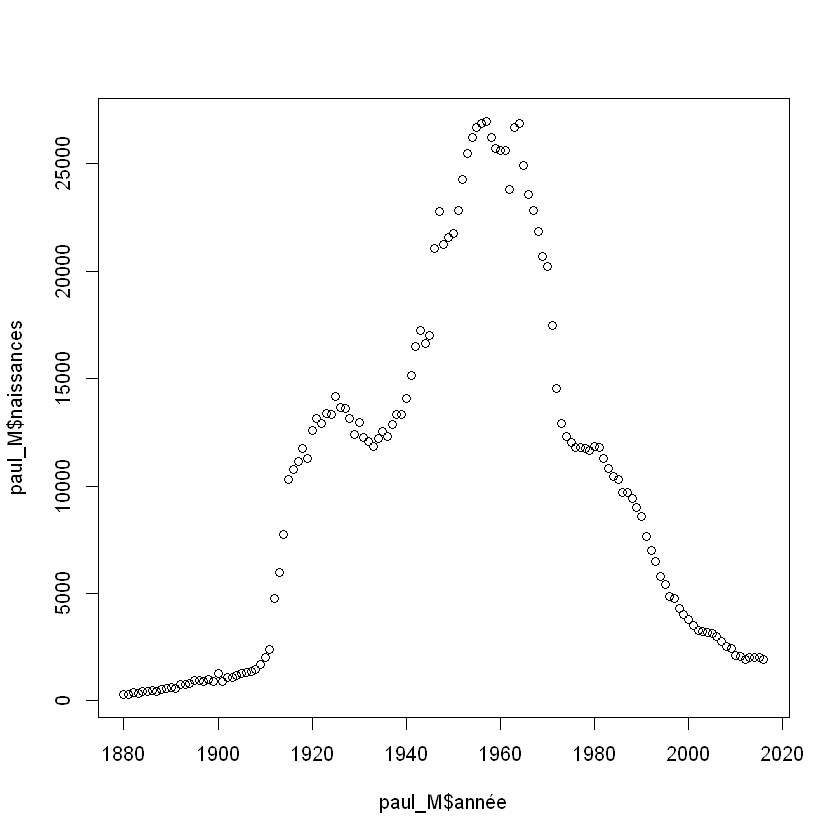

In [19]:
plot(x=paul_M$année, y =paul_M$naissances)

In [1]:
#### Top 10 des prénoms en 2015 Hommes / Femmes


dataset %>% filter(année == "2015") %>% group_by(prénom, naissance)

ERROR: Error in dataset %>% filter(année == "2015") %>% group_by(prénom, naissance): impossible de trouver la fonction "%>%"


#### Exercice


<div class="alert alert-success">

<b>EXERCICE</b>:

 <ul>
  <li>Nombre de femmes s'appelant Charlotte entre 1970 et 1990) ?</li>
 <li> Touver 5 exemple de prenom mixte et comparer les</li>
  <li> Etudier l'évolution de votre prénom depuis 1880 </li>  
</ul>
</div>

<div class="alert alert-success">

<b>Exercice swirl dplyr: A completer</b>:

 <ul>
   <li>1: Manipulating Data with dplyr</li>
   <li>2: Grouping and Chaining with dplyr</li>
   <li>3: Tidying Data with tidyr</li>
   <li>4: Dates and Times with lubridate</li>  
</ul>
</div>

#### Suite: Suite les prénoms Français

https://www.insee.fr/fr/statistiques/2540004